In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("punkt")
nltk.download('omw-1.4')
nltk.download("stopwords")
import re
import string


df = pd.read_csv("C:/ML/python/data/updated_rappers.csv",delimiter=',')

df.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,artist,song,lyric,next lyric
0,0,Fetty Wap,Trap Queen,rgf productions,remy boyz yahah
1,0,Fetty Wap,Trap Queen,remy boyz yahah,1738 ayy
2,0,Fetty Wap,Trap Queen,1738 ayy,im like hey whats up hello
3,0,Fetty Wap,Trap Queen,im like hey whats up hello,seen yo pretty ass soon as you came in the door
4,0,Fetty Wap,Trap Queen,seen yo pretty ass soon as you came in the door,i just wanna chill got a sack for us to roll
5,0,Fetty Wap,Trap Queen,i just wanna chill got a sack for us to roll,married to the money introduced her to my stove
6,0,Fetty Wap,Trap Queen,married to the money introduced her to my stove,showed her how to whip it now she remixin for low
7,0,Fetty Wap,Trap Queen,showed her how to whip it now she remixin for low,she my trap queen let her hit the bando
8,0,Fetty Wap,Trap Queen,she my trap queen let her hit the bando,we be countin up watch how far them bands go
9,0,Fetty Wap,Trap Queen,we be countin up watch how far them bands go,we just set a goal talkin matchin lambos


In [2]:
df.drop_duplicates(inplace=True)
df.dtypes

Unnamed: 0     int64
artist        object
song          object
lyric         object
next lyric    object
dtype: object

In [3]:
df['song'] = df['song'].str.lower()
df['artist'] = df['artist'].str.lower()
df['song'].head(10)

0    trap queen
1    trap queen
2    trap queen
3    trap queen
4    trap queen
5    trap queen
6    trap queen
7    trap queen
8    trap queen
9    trap queen
Name: song, dtype: object

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.nunique()

artist            226
song            17126
lyric         1029419
next lyric    1027971
dtype: int64

In [5]:
df['artist'].value_counts()

artist
lil' kim                11693
eminem                   9254
bone thugs-n-harmony     9139
joe budden               8773
too $hort                8510
                        ...  
rich gang                1833
grandmaster caz          1759
stack bundles            1429
chuck d                  1308
donald glover             637
Name: count, Length: 226, dtype: int64

In [6]:
df['song'].value_counts()

song
daytona 500 (500 bars)                 1464
intro                                  1372
freaky tales                           1354
400 bars (the skeemix)                 1077
300 bars & runnin’                      978
                                       ... 
silence... the new hate (interlude)       1
surviving the game                        1
the.green.whore.net                       1
emmys 2017 acceptance speech              1
thank ya                                  1
Name: count, Length: 17126, dtype: int64

In [7]:
df['next lyric'].value_counts()

next lyric
yeah                                                    1258
embed                                                    883
                                                         446
yeah yeah                                                399
chorus                                                   380
                                                        ... 
everybody move like its your birthday                      1
birthday mama dance on your birthday                       1
mama gon break it down on your birthday                    1
celebrate girl nobody can compare witcha                   1
run laps around your faggot crew like mario andretti       1
Name: count, Length: 1027971, dtype: int64

In [8]:

def remove_html_tags(text):
    pattern = r'<.*?>'
    text = re.sub(pattern,"",text)
    return text



df['lyric'] = df['lyric'].apply(remove_html_tags)
df['next lyric'] = df['next lyric'].apply(remove_html_tags)
df['next lyric'].head(10)

0                                      remy boyz yahah
1                                             1738 ayy
2                          im like hey whats up hello 
3      seen yo pretty ass soon as you came in the door
4         i just wanna chill got a sack for us to roll
5      married to the money introduced her to my stove
6    showed her how to whip it now she remixin for low
7              she my trap queen let her hit the bando
8         we be countin up watch how far them bands go
9             we just set a goal talkin matchin lambos
Name: next lyric, dtype: object

In [9]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)


df['lyric'] = df['lyric'].apply(remove_url)
df['next lyric'] = df['next lyric'].apply(remove_url)
df['lyric'].head(10)

0                                      rgf productions
1                                      remy boyz yahah
2                                             1738 ayy
3                          im like hey whats up hello 
4      seen yo pretty ass soon as you came in the door
5         i just wanna chill got a sack for us to roll
6      married to the money introduced her to my stove
7    showed her how to whip it now she remixin for low
8              she my trap queen let her hit the bando
9         we be countin up watch how far them bands go
Name: lyric, dtype: object

In [10]:

import contractions

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

df['lyric'] = df['lyric'].apply(expand_contractions)
df['next lyric'] = df['next lyric'].apply(expand_contractions)

In [11]:
string.punctuation


def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['next lyric'] = df['next lyric'].apply(remove_punctuation)

df['lyric'] = df['lyric'].apply(remove_punctuation)

In [12]:
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)


df['lyric'] = df['lyric'].apply(remove_stopwords)
df['next lyric'] = df['next lyric'].apply(remove_stopwords)
df['song'] = df['song'].apply(remove_stopwords)
df['lyric'].head(10)

0                      rgf productions
1                      remy boyz yahah
2                             1738 ayy
3                       like hey hello
4    seen yo pretty ass soon came door
5          want chill got sack us roll
6       married money introduced stove
7              showed whip remixin low
8             trap queen let hit bando
9           countin watch far bands go
Name: lyric, dtype: object

In [13]:
lemma = WordNetLemmatizer()

def lemmatize(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(tokens) for tokens in tokens]
    return " ".join(lemma_tokens)

df['lyric'] = df['lyric'].apply(lemmatize)
df['next lyric'] = df['next lyric'].apply(lemmatize)
df['song'] = df['song'].apply(lemmatize)
df['lyric'].head(10)
df['next lyric'].head(10)

0                     remy boyz yahah
1                            1738 ayy
2                      like hey hello
3    seen yo pretty as soon came door
4          want chill got sack u roll
5      married money introduced stove
6             showed whip remixin low
7            trap queen let hit bando
8           countin watch far band go
9      set goal talkin matchin lambos
Name: next lyric, dtype: object

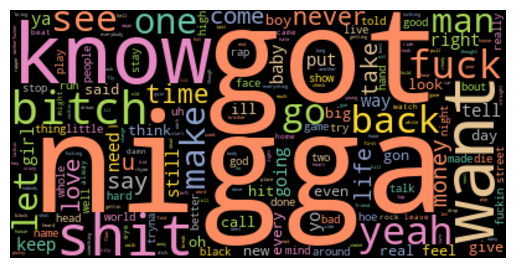

In [14]:
text_lyrics = " ".join(i for i in df['lyric'])
text_next_lyrics = " ".join(i for i in df['next lyric'])
text_song = " ".join(i for i in df['song'])
from wordcloud import WordCloud

wc = WordCloud(colormap="Set2",collocations=False).generate(text_lyrics)
plt.imshow(wc,interpolation='mitchell')
plt.axis("off")
plt.show()

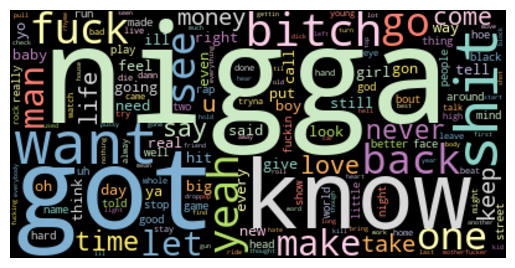

In [15]:
wc = WordCloud(colormap="Set3",collocations=False).generate(text_next_lyrics)
plt.imshow(wc,interpolation="mitchell")
plt.axis("off")
plt.show()

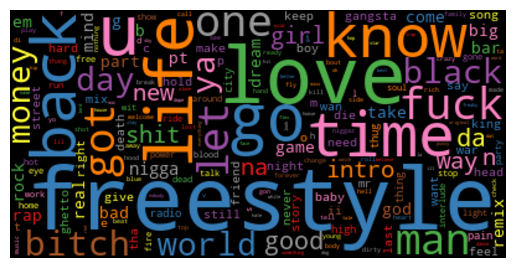

In [16]:
wc = WordCloud(colormap="Set1",collocations=False).generate(text_song)
plt.imshow(wc, interpolation="mitchell")
plt.axis("off")
plt.show()

In [17]:
#I cannot do a$ap rocky :(


### rapper stats
sosa_wilt = df[df['artist'] == 'chief keef']
carter_weezy_tunechi_wayne_new_orleans_own_dr_carter = df[df['artist'] == "lil wayne"]
based_god = df[df['artist'] == 'lil b']
gucci_lemma_lemmonade = df[df['artist'] == 'gucci mane']
nasty_nas_in_your_area_causing_mad_hysteria = df[df['artist'] == 'nas']
the_greatest_rapper_ever = df[df['artist'] == 'danny brown']
satans_son = df[df['artist'] == 'big l']
kanye = df[df['artist'] == 'kanye west']
most_consistent_rapper = df[df['artist'] == 'scarface']
the_modern_dylan_60s_reign_of_albums = df[df['artist'] == 'kendrick lamar']

In [18]:
#this will be fun


from textblob import TextBlob

def polarity(text):
    return TextBlob(text).polarity

df['polarity'] = df['lyric'].apply(polarity)


def sentiment(label):
    if label <0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label >= 0:
        return "Positive"


df['senitment'] = df['polarity'].apply(sentiment)


from nltk.probability import FreqDist
#sosa estketit
sosa_dist = FreqDist(sosa_wilt['lyric'])
top_fifty_sosa = sosa_dist.most_common(50)
print("Top 50 Words used in Chief Keef lyrics",top_fifty_sosa)

Top 50 Words used in Chief Keef lyrics [('bang bang', 19), ('', 10), ('bang', 10), ('young chop beat', 9), ('really understand', 9), ('sosa baby', 8), ('ha ha ha', 8), ('nigga know', 8), ('hoe o', 8), ('bitch got glo one day', 8), ('know got band', 8), ('bitch nigga crackin', 8), ('ayy ayy ayy ayy', 7), ('spell sober', 7), ('want', 7), ('ayy ayy ayy', 7), ('close door', 7), ('gbe baby', 6), ('ayy ayy', 6), ('oblock', 6), ('bitch finally rich', 6), ('ballin', 6), ('damn ha ha ha', 6), ('ayy', 6), ('young nigga savage', 6), ('got money got power got respect tec', 6), ('nigga wildin playing russian roulette', 6), ('bitch nigga shit like', 5), ('want war', 5), ('ballin like jordan', 5), ('understand understand', 5), ('want chill sosa every day', 5), ('matter friend say', 5), ('love guap love guap', 5), ('russian roulette nigga head', 5), ('oblock life', 5), ('close door aye', 5), ('turn damn monster', 5), ('hit stain faneto', 4), ('yeah yeah', 4), ('nigga ballin', 4), ('ballin ballin', 4),

In [19]:
#bro, weezy > anything, like, the last actual superstar
carter_carter_dist_weezy_4lyfe = FreqDist(carter_weezy_tunechi_wayne_new_orleans_own_dr_carter['lyric'])
top_fifty_weezy_weezy_dist = carter_carter_dist_weezy_4lyfe.most_common(50)
print("top 50 most common wayne lyrics: ",top_fifty_weezy_weezy_dist)


top 50 most common wayne lyrics:  [('', 39), ('yeah', 29), ('sky limit', 12), ('tunechi', 11), ('say go dj dj', 10), ('bitch', 8), ('let beat build bitch', 8), ('yeah homies still', 7), ('know compass need', 7), ('hollygrove go hollywood', 7), ('away', 7), ('long bitch love', 6), ('go', 6), ('tell', 6), ('wondering', 6), ('know like touch', 6), ('break broken', 6), ('let work let work', 6), ('dark side moon', 6), ('oh one lead back', 6), ('arguin let gun talk', 6), ('believe believe', 5), ('ugh', 5), ('love love', 5), ('lovely lady lump', 5), ('go stupid go stupid yeah', 5), ('grindin shit', 5), ('let work', 5), ('see walking limp gun walk', 5), ('spark put', 5), ('lil tunechi', 4), ('believe', 4), ('mirror wall', 4), ('told', 4), ('understand man', 4), ('talking', 4), ('realest nigga fuckin game right', 4), ('lie fuckin love woah', 4), ('need bus pas bust yo as nigga', 4), ('uh', 4), ('got chopper car', 4), ('asking searching', 4), ('haha homies still', 4), ('president carter prepresi

In [20]:
# a based top 50
based_dist = FreqDist(based_god['lyric'])
top_ten_based = based_dist.most_common(50)
print("50 most frequent lil b lyrics",top_ten_based)



50 most frequent lil b lyrics [('', 15), ('know', 12), ('life beautiful think life beautiful', 9), ('ratchet bitch cocaina', 6), ('could forget', 6), ('want hate', 5), ('yeah', 5), ('yeah yeah', 5), ('gothboiclique', 5), ('know hear', 5), ('tell fuck', 5), ('give break bullshit', 5), ('said never text', 5), ('make scared baby take back', 4), ('dyin think bitch know', 4), ('going make', 4), ('girl', 4), ('everybody act like care', 4), ('catch feelin', 4), ('keep movin', 4), ('wrote letter write back', 4), ('fuck', 4), ('high since last friday', 4), ('really fucked time', 4), ('know id without', 4), ('send one text get rest', 4), ('ever since left', 4), ('said never text ah', 4), ('make rich', 3), ('love', 3), ('get girl', 3), ('yeah ayy', 3), ('got look bright side', 3), ('since age nine', 3), ('want', 3), ('lay please leave', 3), ('gone know wrong', 3), ('everybody fake', 3), ('line blow right', 3), ('tell rich kid look', 3), ('uh uh uh uh uh uh', 3), ('kissin styrofoam', 3), ('want ta

In [21]:

#gucci mane 1017 bricksquad
gucci_dist = FreqDist(gucci_lemma_lemmonade['lyric'])
gucci_top_burr = gucci_dist.most_common(50)
print("top 50 most used words from gucci mane based on this data",gucci_top_burr)

top 50 most used words from gucci mane based on this data [('gucci', 13), ('yeah', 9), ('icy icy', 9), ('last time took drug took half', 8), ('huh', 8), ('', 8), ('young metro trust gon shoot', 7), ('right', 7), ('hah', 7), ('detail shop beauty parlor cover dirty dollar', 7), ('wop', 6), ('tint shit look darker', 6), ('wop wop wop wop', 6), ('tone shit', 6), ('way throw back make stutter hit', 6), ('bling blaow', 6), ('got nothing', 5), ('tell ball like', 5), ('beat like dog pas dog', 5), ('made hundred thou trap house', 5), ('even sleep got much say', 5), ('whoop whoop', 5), ('enormous', 5), ('aw yeah enormous', 5), ('got work', 4), ('wizop', 4), ('pokin like pussy print', 4), ('zaytoven', 4), ('heard', 4), ('talk', 4), ('tell bartender send twenty case', 4), ('know', 4), ('pourin drank nigga shit darker', 4), ('kush came time look darker', 4), ('nigga makin noise', 4), ('want el chapo', 4), ('zone 6 pablo', 4), ('big boy diamond', 4), ('like way vibin', 4), ('girl photo shoot', 4), (

In [22]:
#I love danny, I cry listening to the end of XXX
danny_brown_stuh = FreqDist(the_greatest_rapper_ever['lyric'])
danny_top_stanny = danny_brown_stuh.most_common(50)
print("top 50 most used words in Danny Brown Lyrics from this dataset",danny_top_stanny)


top 50 most used words in Danny Brown Lyrics from this dataset [('', 24), ('know sayin', 16), ('check', 14), ('get', 6), ('got figure', 6), ('like', 6), ('know', 6), ('way', 6), ('fresh boat', 6), ('really doe like really doe', 5), ('bitch', 5), ('nigga', 5), ('let zone', 5), ('hater leave alone', 5), ('get wet', 5), ('give hell', 5), ('combat zone', 5), ('funny happens', 4), ('dip dip dip dip dip dip dip', 4), ('die like rockstar', 4), ('tell know', 4), ('ya', 4), ('smoking drink drinking smoke', 4), ('fuck got lie', 4), ('oh', 4), ('care nothin nothin', 4), ('go', 4), ('stop', 4), ('red go said red go', 4), ('swear want bread', 4), ('livin best life', 4), ('get koolaid koolaid', 4), ('drop pack water whip whip serve', 4), ('guitar solo', 4), ('rushing kid grown', 3), ('six chevy hoe', 3), ('system division thing add', 3), ('fucked nigga tryna get couple buck', 3), ('kush coma kush coma', 3), ('oh know', 3), ('rain pour get as floor', 3), ('get floor', 3), ('bruiser forget brew', 3), 

In [23]:
#nas
nas_ = FreqDist(nasty_nas_in_your_area_causing_mad_hysteria['lyric'])
nas_top_50 = nas_.most_common(50)
print("nas",nas_top_50)


nas [('', 17), ('mine mine minewhose world', 9), ('hate', 9), ('yeah', 9), ('ruled world', 7), ('say', 7), ('flyest gangster', 7), ('know sayin', 6), ('represent represent', 6), ('check', 6), ('ill want', 6), ('stop', 6), ('one time 4 mind one time', 6), ('guess knew blew good thing baby', 6), ('na coming', 6), ('yeah yeah', 5), ('doubt', 5), ('halftime', 5), ('wack mc', 5), ('think scared u yeah', 5), ('everybodys looking something', 5), ('roll every station wreck dj', 5), ('never personal nowadays way', 5), ('people really', 5), ('love hear story', 5), ('pas nigga come', 5), ('ill prove lost already', 4), ('yayall know steelo', 4), ('one love one love one love one love', 4), ('know', 4), ('na like halfman halfamazin', 4), ('comin outta queensbridge', 4), ('want go red cherry', 4), ('fuck', 4), ('inna new york citycity new york citycity', 4), ('think everyone else', 4), ('would change everything oh yeah', 4), ('made like bought like livin like', 4), ('cop shot kid', 4), ('accident mur

In [24]:
#Big L poor and dangerous

big_l = FreqDist(satans_son['lyric'])
big_l_top_50 = big_l.most_common(50)
print("big l 50",big_l_top_50)


big l 50 [('', 22), ('check', 15), ('big l', 12), ('yeah', 9), ('valuable poet mic', 8), ('might get caught aware', 8), ('like', 8), ('man withstand hold', 7), ('got style copy bitch', 7), ('twelve went hell snuffin jesus', 7), ('wavin automatic gun nun', 7), ('clockin loot knockin boot', 7), ('word', 6), ('ahead time parent met yet', 6), ('yeah yeah', 6), ('every day ask make', 6), ('ya monkey as sittin clinic', 6), ('underground king crowned', 6), ('street struckll get nothin bullet jail time', 5), ('flamboyant entertainment', 5), ('big l corleone', 5), ('yo check', 5), ('make', 5), ('fed bullshit', 5), ('uh huh uh huh', 5), ('mic big l brotha kick flav god', 5), ('principal new school', 5), ('could call mc', 5), ('catch wreck cassette deck', 4), ('known hottie open', 4), ('keep shotty smokin', 4), ('kill born dead', 4), ('way talk yo', 4), ('breakin takin heart', 4), ('know', 4), ('harlem thug rest slug fest', 4), ('style hard like strong lumber', 4), ('afterwards went restroom piss

In [25]:
#ye
kanye_frequency = FreqDist(kanye['lyric'])
kanye_top_50 = kanye_frequency.most_common(50)
print("kanye top 50",kanye_top_50)


kanye top 50 [('', 25), ('feel', 16), ('thirty hour', 14), ('long time ever see', 11), ('turn', 10), ('truth thing get away', 9), ('oh oh oh', 8), ('god', 8), ('comin home', 8), ('know', 7), ('get', 7), ('right', 7), ('oh fall', 7), ('think', 7), ('good morning', 7), ('get get get get', 7), ('everything', 6), ('fuckin ridiculous', 6), ('tellin fall', 6), ('flashing light', 6), ('tell know someone need', 6), ('fuck light', 6), ('everything made everything', 6), ('got remote control', 6), ('worry bout worry bout', 6), ('believe believe', 5), ('girl tryna jerk', 5), ('need see fuckin hand concert', 5), ('know know', 5), ('wanted know', 5), ('yeah', 5), ('uhuh tell nothing', 5), ('never ever let live', 5), ('oh oh ohoh oh', 5), ('sometimes scare', 5), ('mean thing', 5), ('make mistake girl still love', 5), ('junya watanabe wri', 5), ('nothing ever promised tomorrow today', 5), ('champion eye', 5), ('care people say', 5), ('thing', 5), ('iiiiim twoseat lambo', 4), ('power', 4), ('uhhuh hone

In [26]:
#Kendricks three albums of greatness are the same as dylans 3 albums of greatness in the 60s
kendrick_frequency = FreqDist(the_modern_dylan_60s_reign_of_albums['lyric'])
top_50_kendrick = kendrick_frequency.most_common(50)
print("kendrick 50",top_50_kendrick)




kendrick 50 [('', 32), ('bitch kill vibe bitch kill vibe', 12), ('please everybody', 9), ('shit hit fan still fan', 8), ('explain', 8), ('feel', 7), ('homies', 7), ('love count', 7), ('promise sing', 6), ('nobody prayin', 6), ('sometimes', 6), ('said', 6), ('huh heyeah', 6), ('ironic', 6), ('levitate levitate levitate levitate', 6), ('even smoke even smoke', 6), ('king kunta everybody want cut leg', 5), ('want funk', 5), ('love', 5), ('love love love', 5), ('want', 5), ('love love', 5), ('abusing power full resentment', 5), ('resentment turned deep depression', 5), ('loyalty loyalty loyalty', 5), ('pimppimp', 5), ('nigga acting like hoe', 5), ('city quite like mine', 5), ('let explain', 5), ('going growing', 5), ('way', 4), ('faded faded', 4), ('nigga gon alright', 4), ('hear feel gon alright', 4), ('evil lucy around', 4), ('went war last night', 4), ('know', 4), ('lead army make room mistake depression', 4), ('remember conflicted', 4), ('right', 4), ('one day gon burn', 4), ('wall cou

In [27]:
scarface_frequency = FreqDist(most_consistent_rapper['lyric'])
scarface_top_50 = scarface_frequency.most_common(50)
print(scarface_top_50)


[('', 28), ('money make world go round', 16), ('yeah', 10), ('one homies thug nigga', 8), ('money power money power', 8), ('money power', 7), ('smile smile', 6), ('three', 6), ('nigga', 6), ('tell see', 6), ('want', 6), ('stay rooted', 6), ('mary mary mary mary mary', 5), ('hell come get', 5), ('throw hand air like', 5), ('friend know', 5), ('front back side side', 5), ('smile', 4), ('left u exchange', 4), ('fuck', 4), ('chorus', 4), ('rat tat tat tat til as hit muthafuckin floor', 4), ('look eye', 4), ('voice head screaming louder lip', 4), ('want mind blooooow', 4), ('friend', 4), ('always look man eye kill', 4), ('block id never leave block nigga need', 3), ('gangsta live long', 3), ('oh smile', 3), ('inall inall world', 3), ('mean', 3), ('girlfriend', 3), ('feel ya', 3), ('mind playin trick', 3), ('one', 3), ('four finest bitch as find', 3), ('got', 3), ('hustle til see dirt', 3), ('something happens better keep movin', 3), ('real', 3), ('nigga start plottin', 3), ('nigga start sta

In [28]:
#same thing but for next lyric



sosa_dist = FreqDist(sosa_wilt['next lyric'])
top_fifty_sosa = sosa_dist.most_common(50)
print(top_fifty_sosa)

[('bang bang', 16), ('', 10), ('really understand', 10), ('want', 9), ('bang', 8), ('ha ha ha', 8), ('ayy ayy ayy', 8), ('bitch got glo one day', 8), ('close door', 8), ('bitch nigga crackin', 8), ('ballin', 7), ('got money got power got respect tec', 7), ('nigga wildin playing russian roulette', 7), ('gbe baby', 6), ('ayy ayy ayy ayy', 6), ('oblock', 6), ('know', 6), ('damn ha ha ha', 6), ('hoe o', 6), ('know got band', 6), ('spell sober', 5), ('say love whatever', 5), ('bitch finally rich', 5), ('beep', 5), ('want chill sosa every day', 5), ('nigga know', 5), ('love guap love guap', 5), ('young nigga savage', 5), ('got band got band', 5), ('close door aye', 5), ('fuck nigga shit like', 4), ('ayy ayy', 4), ('damn hate bein sober smoker', 4), ('gang gang', 4), ('pussy boy want war', 4), ('yeah yeah', 4), ('nigga ballin', 4), ('ballin ballin', 4), ('understand understand', 4), ('bitch cooler cooler', 4), ('bang bang bang bang bang', 4), ('ball like tomorrow', 4), ('nigga looking like wa

In [29]:
carter_carter_dist_weezy_4lyfe = FreqDist(carter_weezy_tunechi_wayne_new_orleans_own_dr_carter['next lyric'])
top_fifty_weezy_weezy_dist = carter_carter_dist_weezy_4lyfe.most_common(50)
print(top_fifty_weezy_weezy_dist)

[('', 36), ('yeah', 29), ('tunechi', 12), ('sky limit', 11), ('say go dj dj', 10), ('see walking limp gun walk', 9), ('bitch', 8), ('let beat build bitch', 8), ('yeah homies still', 7), ('dark side moon', 7), ('know compass need', 7), ('believe believe', 6), ('realest nigga fuckin game right', 6), ('hey mr carter', 6), ('let work', 6), ('away', 6), ('baby', 6), ('mirror wall', 5), ('fuck though love go', 5), ('asking searching', 5), ('shawty want thug', 5), ('make goon go stupid', 5), ('break broken', 5), ('want problem', 5), ('let work let work', 5), ('get ya', 5), ('oh one lead back', 5), ('hollygrove hollywood hollygrove hollywood', 5), ('moment till make', 5), ('beat shit pussyass nigga', 5), ('go dj dj', 5), ('long bitch love', 4), ('lil tunechi', 4), ('gone', 4), ('talking', 4), ('look look u', 4), ('ugh', 4), ('lie fuckin love woah', 4), ('go', 4), ('bluntblowin polodrawersshowin', 4), ('star somebody lied', 4), ('never really luck could never figure', 4), ('corner tryna put tog

In [30]:
based_dist = FreqDist(based_god['next lyric'])
top_ten_based = based_dist.most_common(50)
print(top_ten_based)


[('', 15), ('know', 12), ('life beautiful think life beautiful', 10), ('ratchet bitch cocaina', 7), ('said never text', 7), ('gothboiclique', 6), ('fuck', 6), ('girl', 5), ('four gold chain gave two brother', 5), ('could keep cool pressure', 5), ('give break bullshit', 5), ('one night alone', 5), ('could forget', 5), ('yeah', 4), ('going make', 4), ('one broken smile', 4), ('everybody fake', 4), ('hate everybody hometown', 4), ('catch feelin', 4), ('kissin styrofoam', 4), ('keep movin', 4), ('wrote letter write back', 4), ('act kind act kind', 4), ('know hear', 4), ('lie', 4), ('calling crazy girl know', 4), ('blowing kiss wind show swim', 4), ('love love feel', 4), ('baby know right', 4), ('molly aquafina', 4), ('know id without', 4), ('lonely sunset without princess', 4), ('nothin like motherfucker', 3), ('make rich', 3), ('lil bo peep brand new bitch', 3), ('want hate', 3), ('bother tell awful thing', 3), ('even know', 3), ('way', 3), ('runnin away take time pain', 3), ('sometimes l

In [31]:
gucci_dist = FreqDist(gucci_lemma_lemmonade['next lyric'])
gucci_top_burr = gucci_dist.most_common(50)
print(gucci_top_burr)


[('gucci', 11), ('young metro trust gon shoot', 9), ('last time took drug took half', 8), ('wop wop wop wop', 8), ('enormous', 8), ('wop', 7), ('tint shit look darker', 7), ('got nothing', 6), ('hah', 6), ('usually unless drunk high', 6), ('tone shit', 6), ('icy icy', 6), ('want el chapo', 6), ('big boy diamond', 6), ('dog dog dog dog', 6), ('hi name gucci mane addicted everything', 6), ('bling blaow', 6), ('swing door swing door', 6), ('even sleep got much say', 6), ('usually le drunk high', 5), ('yeah', 5), ('huh', 5), ('know', 5), ('', 5), ('rollin', 5), ('strip club chillin nonchalant', 5), ('love trust', 5), ('freaky girl bring mama', 5), ('money machine money machine', 5), ('woop woop', 5), ('whoop whoop', 5), ('love thing', 5), ('lemon chain vcuts', 4), ('know deserve know deserve', 4), ('trap house iii got k', 4), ('pussy print ppussy print', 4), ('put long strong bitch leave home', 4), ('cartier frame call four eye', 4), ('rockstar lifestyle might make', 4), ('brick allwhite b

In [32]:
danny_brown_stuh = FreqDist(the_greatest_rapper_ever['next lyric'])
danny_top_stanny = danny_brown_stuh.most_common(50)
print(danny_top_stanny)

[('', 22), ('know sayin', 16), ('tell know', 7), ('know', 7), ('nigga', 6), ('get', 6), ('got figure', 6), ('like', 6), ('way', 6), ('check', 5), ('funny happens', 5), ('bitch', 5), ('dip dip dip dip dip dip dip', 5), ('let zone', 5), ('die like rockstar', 5), ('stop', 5), ('oh know', 5), ('give hell', 5), ('fresh boat', 5), ('combat zone', 5), ('drop pack water whip whip serve', 5), ('kush coma kush coma', 4), ('heard like', 4), ('smoking drink drinking smoke', 4), ('oh', 4), ('care nothin nothin', 4), ('three tear bucket fuck', 4), ('dance water', 4), ('go', 4), ('red go said red go', 4), ('want party time', 4), ('way get wonderbread', 4), ('today today today', 4), ('livin best life', 4), ('nigga theme song bitchass nigga', 4), ('dub step', 4), ('rock shit climate weather', 4), ('embed', 4), ('hot need another drink', 4), ('guitar solo', 4), ('rushing kid grown', 3), ('put cup put four', 3), ('25 buck momma braid hair', 3), ('trapped trap devil forgetting', 3), ('hater leave alone', 

In [33]:
nas_ = FreqDist(nasty_nas_in_your_area_causing_mad_hysteria['next lyric'])
nas_top_50 = nas_.most_common(50)
print(nas_top_50)


[('', 17), ('hate', 11), ('yeah', 8), ('know', 7), ('ruled world', 7), ('made like bought like livin like', 7), ('na coming', 7), ('love hear story', 7), ('know sayin', 6), ('mine mine minewhose world', 6), ('halftime', 6), ('one time 4 mind one time', 6), ('think scared u yeah', 6), ('still survive', 6), ('represent represent', 5), ('na like life death rebel', 5), ('yeah yeah', 5), ('brother daughter call', 5), ('cop shot kid', 5), ('got mine hope got gun', 5), ('na na', 5), ('heaven mile away', 5), ('make sure supposed', 5), ('say', 5), ('flow street else could', 5), ('nigga better watch ya back cold', 5), ('flyest gangster', 5), ('never sleep sleep cousin death', 4), ('fuck soul like ether', 4), ('yayall know steelo', 4), ('one love one love one love one love', 4), ('doubt', 4), ('need one mic', 4), ('man like', 4), ('stop', 4), ('fuck', 4), ('epmd back business', 4), ('na di na di na di na di', 4), ('check', 4), ('guess knew blew good thing baby', 4), ('street dream made', 4), ('pi

In [34]:
big_l = FreqDist(satans_son['next lyric'])
big_l_top_50 = big_l.most_common(50)
print(big_l_top_50)

[('', 21), ('check', 13), ('twelve went hell snuffin jesus', 11), ('big l', 10), ('yeah', 9), ('like', 9), ('could call mc', 9), ('aiyyo fella got careful today', 8), ('word', 7), ('make', 7), ('fed bullshit', 7), ('ahead time parent met yet', 6), ('got style copy bitch', 6), ('rap game would mvp', 6), ('valuable poet mic', 5), ('flamboyant entertainment', 5), ('big l corleone', 5), ('take', 5), ('word money longer oj trial', 5), ('aight', 5), ('knockin nigga knockin nigga', 5), ('mic big l brotha kick flav god', 5), ('principal new school', 5), ('catch wreck cassette deck', 4), ('known hottie open', 4), ('keep shotty smokin', 4), ('kill born dead', 4), ('onethreenine lenox danger zone', 4), ('wavin automatic gun nun', 4), ('peace', 4), ('better listen l rhyme', 4), ('top everythings okay', 4), ('breakin takin heart', 4), ('harlem thug rest slug fest', 4), ('style hard like strong lumber', 4), ('understand', 4), ('every day ask make', 4), ('afterwards went restroom pissed cristal', 4),

In [35]:
kanye_frequency = FreqDist(kanye['next lyric'])
kanye_top_50 = kanye_frequency.most_common(50)
print(kanye_top_50)

[('', 26), ('thirty hour', 15), ('feel', 14), ('long time ever see', 11), ('truth thing get away', 10), ('get', 9), ('god', 9), ('right', 9), ('turn', 8), ('oh fall', 8), ('comin home', 8), ('good morning', 8), ('ooooookay lamborghini mercy', 7), ('know', 7), ('get much higher', 7), ('oh oh oh', 7), ('think', 7), ('la la la la', 6), ('tellin fall', 6), ('make mistake girl still love', 6), ('fuck light', 6), ('diamond forever', 6), ('got remote control', 6), ('worry bout worry bout', 6), ('uhhuh honey', 5), ('know new slave', 5), ('wanted know', 5), ('bam bam ey ey ey', 5), ('fuckin ridiculous', 5), ('mean thing', 5), ('flashing light', 5), ('feel fadin', 5), ('dem gwaan dem dem dem gwaan', 5), ('lost world whole life', 5), ('tell know someone need', 5), ('get get get get', 5), ('big brother bigs brother', 5), ('junya watanabe wri', 5), ('nothing ever promised tomorrow today', 5), ('realize', 5), ('everything made everything', 5), ('damn go', 5), ('working graveshift', 5), ('care people

In [36]:
kendrick_frequency = FreqDist(the_modern_dylan_60s_reign_of_albums['next lyric'])
top_50_kendrick = kendrick_frequency.most_common(50)
print(top_50_kendrick)

[('', 28), ('bitch kill vibe bitch kill vibe', 9), ('shit hit fan still fan', 8), ('explain', 8), ('please everybody', 8), ('love', 7), ('want', 7), ('homies', 7), ('hiiipower', 7), ('love count', 7), ('nobody prayin', 6), ('sometimes', 6), ('wall could talk', 6), ('said', 6), ('levitate levitate levitate levitate', 6), ('hol hol', 6), ('bitch walkin', 5), ('want funk', 5), ('love love love', 5), ('life want money power', 5), ('nigga gon alright', 5), ('abusing power full resentment', 5), ('resentment turned deep depression', 5), ('ironic', 5), ('got lie kick nigga', 5), ('every time come around', 5), ('hurt people love u love people hurt u', 5), ('let explain', 5), ('way', 4), ('feel', 4), ('anytime', 4), ('evil lucy around', 4), ('promise sing', 4), ('loyalty loyalty loyalty', 4), ('went war last night', 4), ('know', 4), ('let word earth moon consume every message', 4), ('remember conflicted', 4), ('right', 4), ('taught share care', 4), ('one day gon burn', 4), ('a1 since day one nig

In [37]:
scarface_frequency = FreqDist(most_consistent_rapper['next lyric'])
scarface_top_50 = scarface_frequency.most_common(50)
print(scarface_top_50)



[('', 29), ('money make world go round', 15), ('yeah', 11), ('one homies thug nigga', 9), ('embed', 9), ('one', 8), ('money power', 7), ('money power money power', 7), ('smile smile', 6), ('girlfriend', 6), ('mary mary mary mary mary', 6), ('nigga', 6), ('want', 6), ('must used finer thing', 5), ('let roooooooooooooll', 5), ('throw hand air like', 5), ('always look man eye kill', 5), ('smile', 4), ('block everything everything sheezy', 4), ('oh smile', 4), ('fuck', 4), ('chorus', 4), ('mind playin trick', 4), ('rat tat tat tat til as hit muthafuckin floor', 4), ('think motherfuckin game', 4), ('rollin yo muthafuckin hood', 4), ('look eye', 4), ('stay rooted', 4), ('hook', 4), ('lord please murda enemy', 4), ('watching u unfold time', 4), ('whether win lose life die', 4), ('cmon ah cmon', 4), ('love mo end', 4), ('sunshine', 4), ('dope man pushin', 4), ('front back side side', 4), ('listens pray', 3), ('worldall world', 3), ('mean', 3), ('thang maryjane', 3), ('sometimes close eye tryin

<Axes: ylabel='count'>

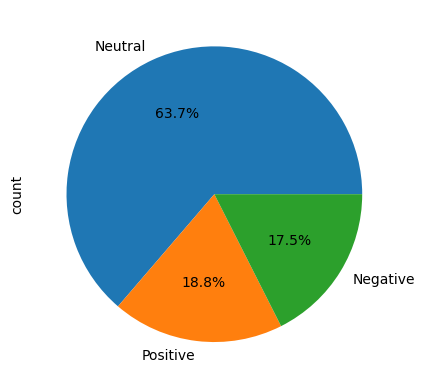

In [38]:
df['senitment'].value_counts().plot(kind='pie',autopct="%1.1f%%")

In [39]:
###could have done more


from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split
X = df['lyric']
y = df['senitment']
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

X_train = tfid.fit_transform(X_train)
X_test = tfid.transform(X_test)


from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier

lr = LogisticRegression()
PA = PassiveAggressiveClassifier()


from sklearn.naive_bayes import MultinomialNB,BernoulliNB

MNB = MultinomialNB()
BNB = BernoulliNB()

from sklearn.metrics import accuracy_score,classification_report

def evaluate_rapper(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --Classification report-- {clf_rpt}')
    return pred


lr_pred = evaluate_rapper(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_rapper(X_train, X_test, y_train, y_test, PA)
MNB_pred = evaluate_rapper(X_train, X_test, y_train, y_test, MNB)

LogisticRegression, --Accuracy-- 98.68%; --Classification report--               precision    recall  f1-score   support

           0       0.98      0.97      0.97     43622
           1       0.99      1.00      0.99    158170
           2       0.98      0.97      0.98     46359

    accuracy                           0.99    248151
   macro avg       0.98      0.98      0.98    248151
weighted avg       0.99      0.99      0.99    248151

PassiveAggressiveClassifier, --Accuracy-- 99.33%; --Classification report--               precision    recall  f1-score   support

           0       0.98      0.99      0.99     43622
           1       1.00      1.00      1.00    158170
           2       0.98      0.99      0.99     46359

    accuracy                           0.99    248151
   macro avg       0.99      0.99      0.99    248151
weighted avg       0.99      0.99      0.99    248151

MultinomialNB, --Accuracy-- 92.21%; --Classification report--               precision    recall